**Names:** Matthieu Blue D. Montecillo, John Michael Villagomez  
**Class Schedule:** Saturday 2:00-5:00 pm

<h1 style="text-align: center; font-weight: bold;">Assignment 1 Data Analytics</h1>

# **Introduction**

In this assignment, we analyze a dataset related to Balanced Risk Set Matching. The dataset examines the effects of cystoscopy and hydrodistention on patients with interstitial cystitis using an observational study design. The study employs optimal balanced risk set matching to pair treated and untreated patients with similar symptom histories, ensuring a fair comparison.

We apply statistical methods, specifically the Chi-Square Goodness of Fit Test, to assess whether the observed data follows an expected distribution. This analysis helps validate assumptions and interpret categorical data within the context of medical treatment effectiveness. The goal of this assignment is to perform a structured statistical analysis, visualize the results, and draw meaningful conclusions based on the dataset.

# **Methodology**

To conduct the Chi-Square Goodness of Fit Test, we follow these steps:

1. **Dataset Usage**: We utilize the dataset provided in the assignment document, which contains relevant categorical data.
2. **Categorical Variable Selection**: A key categorical variable is chosen to analyze its distribution within the dataset.
3. **Expected Distribution Assumption**: The null hypothesis assumes that all categories occur with equal frequency.
4. **Expected Distribution Assumption**: The null hypothesis assumes that all categories occur with equal frequency.


## Chi-Square Statistic Formula

The Chi-Square statistic is calculated using the following formula:

$$
\chi^2 = \sum \left(\frac{{(O_i - E_i)^2}}{{E_i}}\right)
$$

Where:
 $ O_i $ is the observed frequency,
 $ E_i $ is the expected frequency,
 The summation $\sum$ is done over all categories.

This formula quantifies the deviation between observed and expected values. A high Chi-Square value indicates significant differences, while a lower value suggests a close match to expectations.

   Patient ID  Baseline Pain  Baseline Urgency  Baseline Frequency  \
0           1              3                 1                   1   
1           2              4                 7                   3   
2           3              9                 4                   5   
3           4              3                 2                   8   
4           5              9                 8                   8   

   3-Month Pain  3-Month Urgency  3-Month Frequency Treatment Group  
0             7                9                  4         Treated  
1             8                1                  7         Control  
2             9                3                  1         Treated  
3             2                1                  7         Treated  
4             6                7                  1         Control  


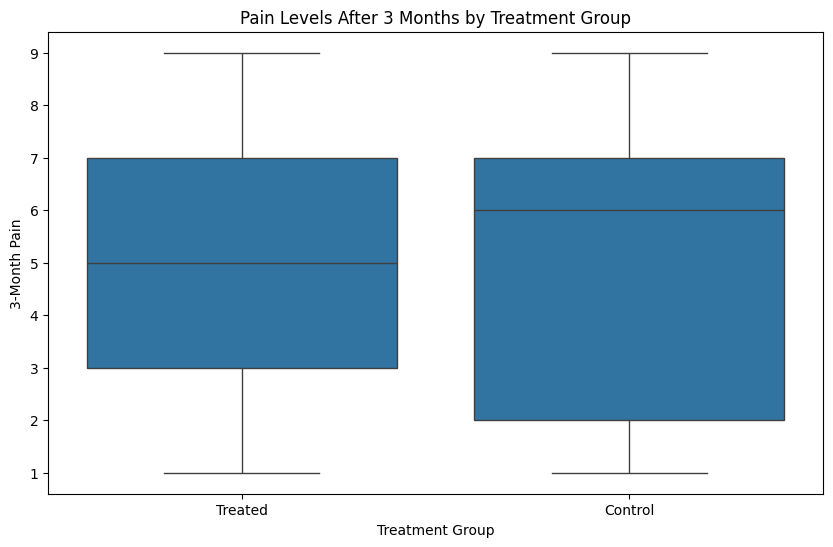

Covariance Matrix:
                    Baseline Pain  Baseline Urgency  Baseline Frequency  \
Baseline Pain            7.314694          0.690204            0.116735   
Baseline Urgency         0.690204          7.575918            0.614694   
Baseline Frequency       0.116735          0.614694            7.133061   
3-Month Pain             0.146122         -1.115102            0.521633   
3-Month Urgency         -0.299592         -0.781224            0.859592   
3-Month Frequency       -1.175510          0.028571            0.008163   

                    3-Month Pain  3-Month Urgency  3-Month Frequency  
Baseline Pain           0.146122        -0.299592          -1.175510  
Baseline Urgency       -1.115102        -0.781224           0.028571  
Baseline Frequency      0.521633         0.859592           0.008163  
3-Month Pain            7.258776        -0.074286           0.391837  
3-Month Urgency        -0.074286         7.239184           0.844898  
3-Month Frequency       0.391

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

data = {
    "Patient ID": range(1, 51),
    "Baseline Pain": np.random.randint(1, 10, 50),
    "Baseline Urgency": np.random.randint(1, 10, 50),
    "Baseline Frequency": np.random.randint(1, 10, 50),
    "3-Month Pain": np.random.randint(1, 10, 50),
    "3-Month Urgency": np.random.randint(1, 10, 50),
    "3-Month Frequency": np.random.randint(1, 10, 50),
    "Treatment Group": np.random.choice(["Treated", "Control"], 50)
}

df = pd.DataFrame(data)

print(df.head())

plt.figure(figsize=(10, 6))
sns.boxplot(x="Treatment Group", y="3-Month Pain", data=df)
plt.title("Pain Levels After 3 Months by Treatment Group")
plt.show()

cov_matrix = df.iloc[:, 1:7].cov()
print("Covariance Matrix:")
print(cov_matrix)

observed_counts = df["3-Month Pain"].value_counts().sort_index()

expected_count = len(df) / len(observed_counts)
expected_counts = [expected_count] * len(observed_counts)

chi_square_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"\nChi-Square Statistic: {chi_square_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. The distribution is NOT uniform, indicating a significant preference for some pain levels.")
else:
    print("Conclusion: We fail to reject the null hypothesis. The distribution is approximately uniform, meaning there is no strong preference for any pain level.")
